In [1]:
import pandas as pd
import numpy as np
#Please change the file path to 

df=pd.read_csv('D://HireArt.csv')
df['Date of Contact']=pd.to_datetime(df['Date of Contact'])
df.index=df['Date of Contact']

# Grouping

In [2]:
#grouping the values on the basis of year and month

df1=df.groupby(by=[df.index.year ,df.index.month])

In [3]:
#Calculating only unique clients

df2=df1.agg({ "Client Name": pd.Series.nunique})

df2.columns=['Number of Clients']
df2['Percentage']=None #Adding new column for percentages


df2.index.names=['Year','Month']


In [4]:
#Total number of clients reached out in an year

df3=df.groupby(by=[df.index.year])
df3=df3.agg({ "Client Name": pd.Series.nunique})
df3.index.names=['Year']
df3=pd.DataFrame(df3)
df3.columns=['Total Number of Clients']

In [5]:
#Merging the two dataframe on the basis of year
df_merged=df2.merge(df3,left_index=True,right_index=True)

In [6]:
#Changing the type of columns suitable for performing calcualtions for percentages

df_merged['Total Number of Clients']=df_merged['Total Number of Clients'].astype('int')
df_merged['Number of Clients']=df_merged['Number of Clients'].astype('int')

In [7]:
#Calculating Percentage
df_merged['Percentage']=np.round( df_merged['Number of Clients']/df_merged['Total Number of Clients']*100,2)

In [8]:
#Finding the maximum percentage from the group
df_merged=df_merged.loc[df_merged.groupby([ "Year"])["Percentage"].idxmax()]   

df_merged

,,Number of Clients,Percentage,Total Number of Clients
Year,Month,,,
2013,10,31,88.57,35
2014,10,28,80.00,35
2015,10,28,80.00,35
2016,10,25,71.43,35
2017,9,21,60.00,35


In [9]:
#Saving the final results to csv
#Change the path where you want to save the file
df_merged.to_csv('D:/Final_Precentages.csv')

Visualizing the results we found

In [10]:

import matplotlib.pyplot as plt

%matplotlib inline
df_merged=df_merged.groupby(['Year','Month']).Percentage.max()

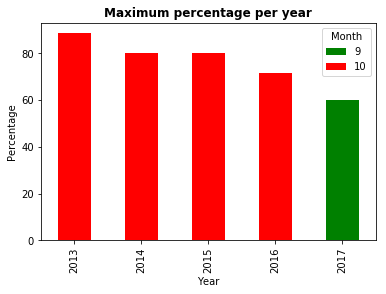

In [11]:

dateLabelsFig = df_merged.unstack().plot(kind='bar',stacked=True,  color=['green', 'red', 'red'], grid=False)
plt.title('Maximum percentage per year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Percentage');